In [9]:
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('biel_train.csv')
validation = pd.read_csv('biel_validation.csv')
validation = validation[0:280]

# y_temp 결측치 제거
df = df.dropna()

# 'shape' 열 삭제
df = df.drop(['shape'], axis=1)
validation = validation.drop(['shape'], axis=1)

# 'location'이 'top'인 데이터만 df에 저장
df = df[df['location'] == 'bottom']

# 'location' 열 삭제
df = df.drop(['location'], axis=1)
validation = validation.drop(['location'], axis=1)

columns = list(df.columns.values)
columns.remove('y_temp')
print(columns)

# validation = validation.drop(['y_temp'], axis=1)
v_columns = list(validation.columns.values)
v_columns.remove('y_temp')
print(v_columns)

# 학습과 데이터셋 지정
X_train = df[columns]
y_train = df[['y_temp']]
X_test = validation[v_columns]
print (X_test)



['max_tem', 'tem_rate', 'height', 'length', 'width', 'W_top', 'W_side', 'W_bottom', 'tem_initial', 'tem_out', 'days']
['max_tem', 'tem_rate', 'height', 'length', 'width', 'W_top', 'W_side', 'W_bottom', 'tem_initial', 'tem_out', 'days']
     max_tem  tem_rate  height  length  width  W_top  W_side  W_bottom  \
0       48.8      0.73     4.4      20      2     13      14       2.7   
1       48.8      0.73     4.4      20      2     13      14       2.7   
2       48.8      0.73     4.4      20      2     13      14       2.7   
3       48.8      0.73     4.4      20      2     13      14       2.7   
4       48.8      0.73     4.4      20      2     13      14       2.7   
..       ...       ...     ...     ...    ...    ...     ...       ...   
275     48.8      0.73     4.4      20      2     13      14       2.7   
276     48.8      0.73     4.4      20      2     13      14       2.7   
277     48.8      0.73     4.4      20      2     13      14       2.7   
278     48.8      0.73  

## model 생성

In [2]:
model = XGBRegressor(n_estimators=400) # 트리 개수 400개로 모델 생성
model.fit(X_train, y_train)
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

### XGBoost로 feature importance 확인

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

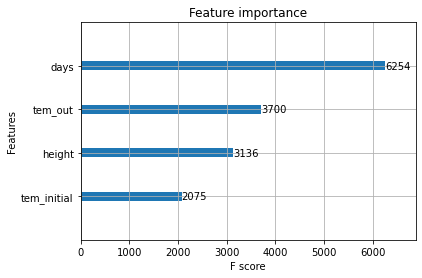

In [3]:
plot_importance(model)

## y_temp 예측

In [4]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test) # 예측치

In [5]:
validation['y_temp'] = y_pred

In [6]:
validation

,max_tem,tem_rate,height,length,width,W_top,W_side,W_bottom,tem_initial,tem_out,days,y_temp
0,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,0.1,18.442835
1,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,0.2,21.572577
2,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,0.3,24.368357
3,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,0.4,26.860571
4,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,0.5,29.091614
...,...,...,...,...,...,...,...,...,...,...,...,...
275,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,27.6,-0.257819
276,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,27.7,-0.257819
277,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,27.8,-0.257819
278,48.8,0.73,4.4,20,2,13,14,2.7,15,-5,27.9,-0.257819


In [7]:
validation.to_excel('DecisionTree_sw1_validation_result_2.xlsx')

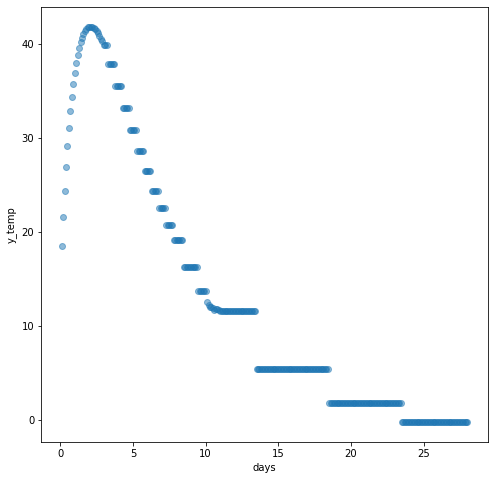

In [8]:
fig = plt.figure(figsize=(8,8))
plt.scatter(validation['days'], validation['y_temp'], alpha=0.5)
plt.xlabel('days')
plt.ylabel('y_temp')
plt.show()

In [8]:
# df_15 = df[df['tem_initial'] == 15]
# df_15 = df_15[df_15['tem_out'] == -5]

In [9]:
# fig = plt.figure(figsize=(8,8))
# plt.scatter(validation['days'], validation['y_temp'], c='red', alpha=0.5, label='fitted_data')
# plt.scatter(df_15['days'], df_15['y_temp'], c='blue', alpha=0.5, label='real_data')
# plt.ylabel('temperature')
# plt.xlabel('days')
# plt.legend(loc='best')
# plt.show()